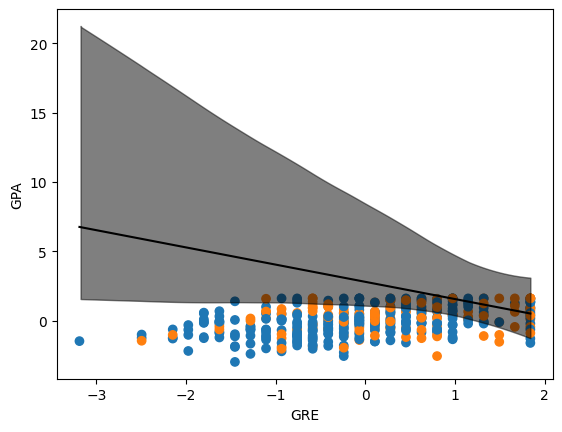

In [10]:
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    ans = pd.read_csv("Admission.csv")
    ans.head()
    df = ans.query("Admission == (0, 1)")
    y_1 = pd.Categorical(df['Admission']).codes
    x_n = ['GRE', 'GPA']
    x_1 = df[x_n].values

    x_1_standardized = (x_1 - x_1.mean(axis=0)) / x_1.std(axis=0)

    with pm.Model() as model_1:
        alpha = pm.Normal('alpha', mu=0, sigma=10)
        beta = pm.Normal('beta', mu=0, sigma=2, shape=len(x_n))
        mu = alpha + pm.math.dot(x_1_standardized, beta)
        theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
        bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_1_standardized[:, 0])
        yl = pm.Bernoulli('yl', p=theta, observed=y_1)
        idata_1 = pm.sample(2000, return_inferencedata=True)

    idx = np.argsort(x_1_standardized[:, 0])
    bd = idata_1.posterior['bd'].mean(("chain", "draw"))[idx]
    plt.scatter(x_1_standardized[:, 0], x_1_standardized[:, 1], c=[f'C{x}' for x in y_1])
    plt.plot(x_1_standardized[:, 0][idx], bd, color='k')
    az.plot_hdi(x_1_standardized[:, 0], idata_1.posterior['bd'], color='k')
    plt.xlabel(x_n[0])
    plt.ylabel(x_n[1])
    """
    ppc = pm.sample_posterior_predictive(idata_1, model=model_1)
    student_ex3 = (np.array([550, 3.5]) - x_1.mean(axis=0)) / x_1.std(axis=0)
    prob = 1 / (1 + np.exp(-(ppc['alpha'] + np.dot(ppc['beta'], student_ex3))))
    hdi = az.hdi(prob.flatten(), hdi_prob=0.9)
    print("ex3: ", hdi)

    ppc = pm.sample_posterior_predictive(idata_1, model=model_1)
    student_ex4 = (np.array([500, 3.2]) - x_1.mean(axis=0)) / x_1.std(axis=0)
    prob = 1 / (1 + np.exp(-(ppc['alpha'] + np.dot(ppc['beta'], student_ex4))))
    hdi = az.hdi(prob.flatten(), hdi_prob=0.9)
    print("ex3: ", hdi) """


# New Section